<a href="https://colab.research.google.com/github/RashidLadj/ConformalGeometricAlgebra_OpenGL3_SolarSystem/blob/master/Sift_and_surf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Key point detection

Configurer OpenCV

In [31]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

  Using cached https://files.pythonhosted.org/packages/61/29/fc60b2de1713aa92946992544329f20ccb5e4ba26290f403e04b7da44105/opencv_contrib_python-3.4.2.17-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/03/27/e35e7c6e6a52fab9fcc64fc2b20c6b516eba930bb02b10ace3b38200d3ab/numpy-1.18.4-cp36-cp36m-manylinux1_x86_64.whl
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4
  Found existing installation: opencv-contrib-python 3.4.2.17
    Unins

#Import

In [0]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Method 1 : Sift 

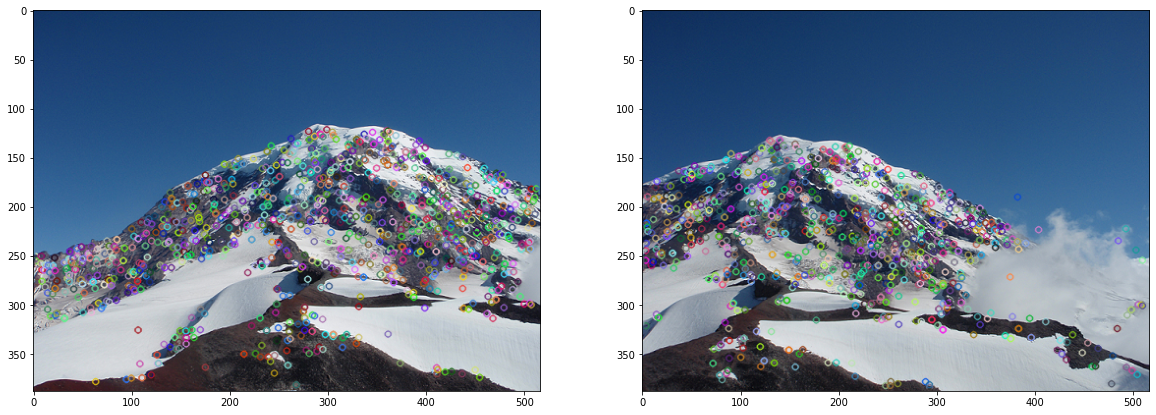

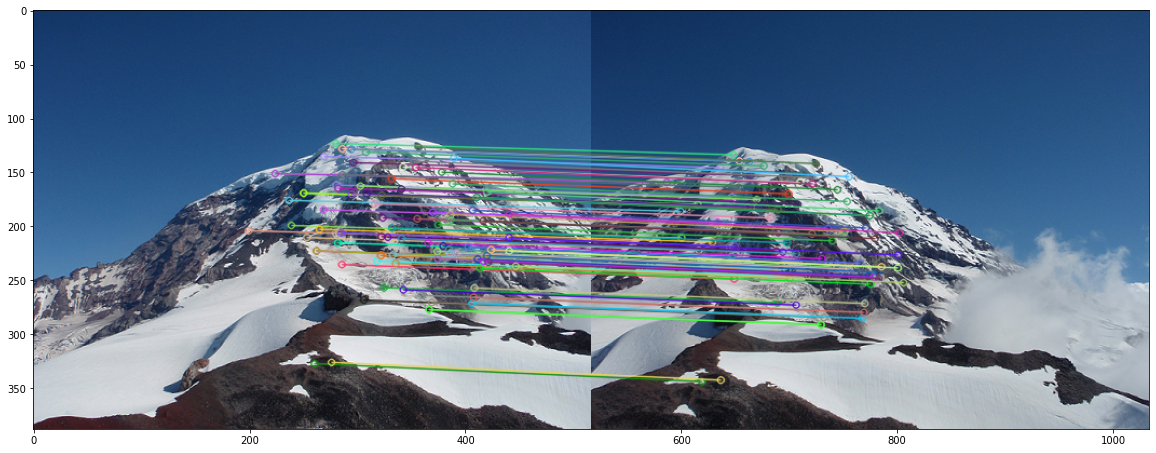

In [26]:


# Read image in gray Scale :D
img1 = cv.imread('set1-1.jpg')
gray1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2 = cv.imread('set1-2.jpg')
gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

# for opencv 3.x and above
sift = cv.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)

# Start Display Key Point #
img11 = img1.copy()
img11  =cv.drawKeypoints(img11,kp1,img11)

img22 = img2.copy()
img22  =cv.drawKeypoints(img22,kp2,img22)

img11 = cv.cvtColor(img11,cv.COLOR_BGR2RGB)
img22 = cv.cvtColor(img22,cv.COLOR_BGR2RGB)

f = plt.figure(figsize=(20, 20))
f.add_subplot(1,2, 1)
plt.imshow(np.rot90(img11,4))
f.add_subplot(1,2, 2)
plt.imshow(np.rot90(img22,4))
plt.show(block=True)
# End Display Key Point #

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.15*n.distance:
        good.append([m])

# plt use RGB et non pas BGR, donc juste pour un affichage meilleur
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)

# Matching 
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good, None, flags=2)

plt.figure(figsize=(20, 20))
plt.imshow(img3)
plt.show()

#Method 2 : Surf

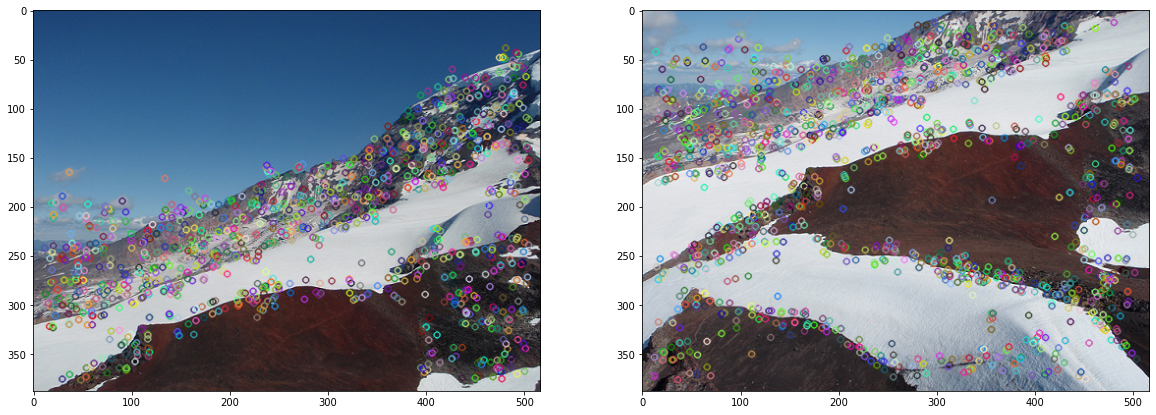

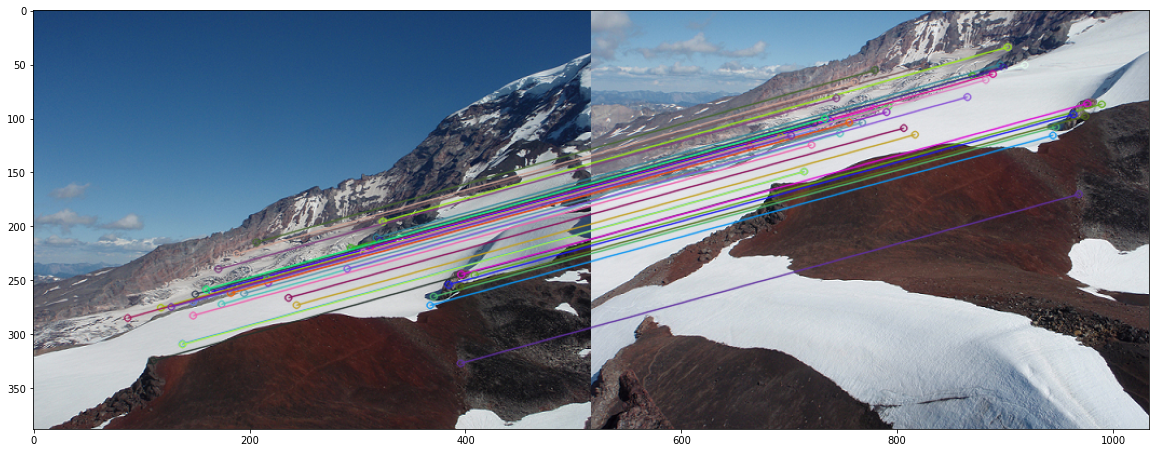

In [31]:
# Read image in gray Scale :D
img1 = cv.imread('set1-3.png')
gray1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2 = cv.imread('set1-4.png')
gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

# for opencv 3.x and above
surf = cv.xfeatures2d.SURF_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = surf.detectAndCompute(gray1,None)
kp2, des2 = surf.detectAndCompute(gray2,None)

# Start Display Key Point #
img11 = img1.copy()
img11  =cv.drawKeypoints(img11,kp1,img11)

img22 = img2.copy()
img22  =cv.drawKeypoints(img22,kp2,img22)

img11 = cv.cvtColor(img11,cv.COLOR_BGR2RGB)
img22 = cv.cvtColor(img22,cv.COLOR_BGR2RGB)

f = plt.figure(figsize=(20, 20))
f.add_subplot(1,2, 1)
plt.imshow(np.rot90(img11,4))
f.add_subplot(1,2, 2)
plt.imshow(np.rot90(img22,4))
plt.show(block=True)
# End Display Key Point #

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.20*n.distance:
        good.append([m])

# plt use RGB et non pas BGR, donc juste pour un affichage meilleur
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)

# Matching 
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good, None, flags=2)

plt.figure(figsize=(20, 20))
plt.imshow(img3)
plt.show()